In [51]:
ReloadProject('deep_learning')

notebook_init.py imported and reloaded
forwarded symbol: A
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: InputLayer
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: T
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: logging
forwarded symbol: logging
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_base
forwarded symbol: q_base
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_impl
forwarded symbol: runner_impl


In [52]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
qfunc = qfunc_impl.DQN(
    state_space_dim=env.GetStateSpaceDimension(),
    action_space_size=env.GetActionSpaceSize(),
    hidden_layer_sizes=(64,),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

In [54]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[02:38:46] q_base.py:390 Episode 0/500: total_reward = 9.00, total_steps=8
[02:38:49] q_base.py:392 Episode 100/500: total_reward = 10.00, total_steps=9
[02:38:55] q_base.py:392 Episode 200/500: total_reward = 10.00, total_steps=9
[02:39:01] q_base.py:392 Episode 300/500: total_reward = 19.00, total_steps=18
[02:39:44] q_base.py:392 Episode 400/500: total_reward = 68.00, total_steps=67
CPU times: user 3min 41s, sys: 416 ms, total: 3min 42s
Wall time: 3min 42s


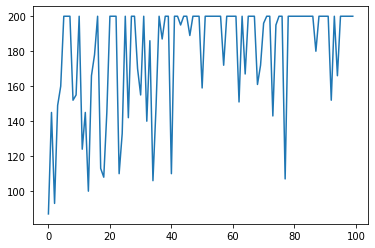

CPU times: user 8min 57s, sys: 1.87 s, total: 8min 59s
Wall time: 9min 1s


In [56]:
%%time
# Train
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)

In [30]:
%%time
# Train
logging.ENV.debug_verbosity = 2
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=10000, do_report=False)

KeyboardInterrupt: 

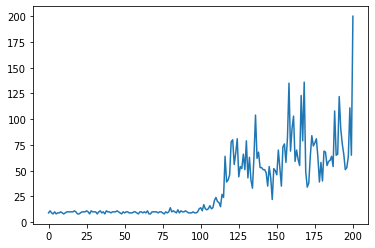

CPU times: user 18.1 s, sys: 16 ms, total: 18.1 s
Wall time: 18.2 s


In [32]:
%%time
# Train
logging.ENV.debug_verbosity = 2
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=1, do_report=True)

In [40]:
qfunc._model.save('saved_model_0733')

In [ ]:
%%time
# Train
logging.ENV.debug_verbosity = 2
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=1, do_report=True)